## Fase 5: Visualización de Datos desde MongoDB

#### Objetivo 
Consumir la información almacenada en la base de datos Bank_2025 y generar reportes visuales utilizando 
Python, con enfoque en análisis exploratorio de datos. 

## 1. Librerías Necesarias

Ejecuta esto en tu entorno virtual si aún no las tienes instaladas: 
matplotlib seaborn pandas pymongo.

In [8]:
#pip install matplotlib seaborn pandas pymongo 

## 2. Extraer la Data
Guarda este archivo dentro del proyecto (por ejemplo, en una carpeta visualizacion/ o en la raíz del 
proyecto). 

In [9]:
# visualizar_datos 
import pandas as pd 
from pymongo import MongoClient 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path

#  Conectar a MongoDB 
client = MongoClient("mongodb://localhost:27017/") 
db = client["Bank_2025"] 
collection = db["prestamos"] 

#  Leer los datos desde MongoDB y convertirlos a DataFrame 
data = list(collection.find({}, {"_id": 0}))  # Omitimos el campo _id 
df = pd.DataFrame(data)
print("✅ Datos cargados desde MongoDB correctamente.") 
print(f"Total de registros: {len(df)}\n") 

# Crear carpeta para guardar gráficos 
reports_path = Path.cwd() / "../docs" 
reports_path.mkdir(parents=True, exist_ok=True) 

# Vista previa 
print("Vista previa de los datos:\n") 
print(df.head())

✅ Datos cargados desde MongoDB correctamente.
Total de registros: 1000

Vista previa de los datos:

        Num_Cta Cli_codigo     TipoCuenta    Sucursal FechaApertura     Saldo
0  191-10001-45      C0001  CTA CORRIENTE       Lince    14/07/2018   9864.22
1  191-10002-87      C0002  CTA CORRIENTE   La Molina    12/01/2011   4448.56
2  191-10003-26      C0003  CTA CORRIENTE       Surco    18/12/2014  10143.61
3  191-10004-54      C0004  CTA CORRIENTE  Miraflores    16/03/2018   7981.49
4  191-10005-67      C0005  CTA CORRIENTE  Miraflores    17/10/2023  11442.04


### 1. Distribución de saldos 
Nota. Si hay error (Instalar las librerias en la consola):  
pip install matplotlib seaborn pandas pymongo 

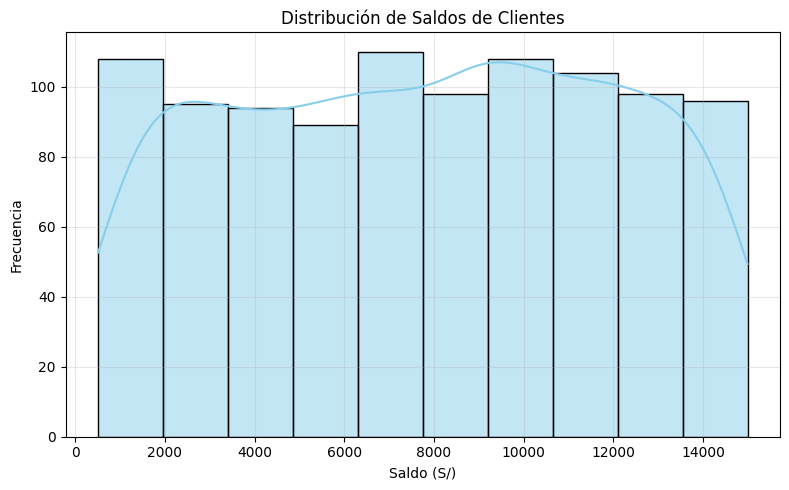

In [10]:
plt.figure(figsize=(8,5)) 
sns.histplot(df["Saldo"], bins=10, kde=True, color='skyblue') 
plt.title("Distribución de Saldos de Clientes") 
plt.xlabel("Saldo (S/)") 
plt.ylabel("Frecuencia") 
plt.grid(True, alpha=0.3) 
plt.tight_layout() 
plt.savefig(reports_path / "distribucion_saldos.png") 
plt.show() 

### 2. Cantidad de cuentas por tipo

En versiones recientes de seaborn, el parámetro <palette> solo debe usarse cuando hay una variable 
categórica asignada a hue (es decir, cuando estás coloreando por una segunda variable). 

##### Explicación adicional  
- hue="TipoCuenta" le dice a seaborn: "colorea cada valor de TipoCuenta con un color distinto". 
- Como ya estás mostrandoTipoCuenta en el eje y, la leyenda sería redundante → por eso usamos 
legend=False. 
- Esto es ahora el método oficial para colorear barras por categoría en countplot.

C:\Users\balfa\AppData\Local\Temp\ipykernel_23812\3872494562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="TipoCuenta", data=df, order=df["TipoCuenta"].value_counts().index, palette="viridis")


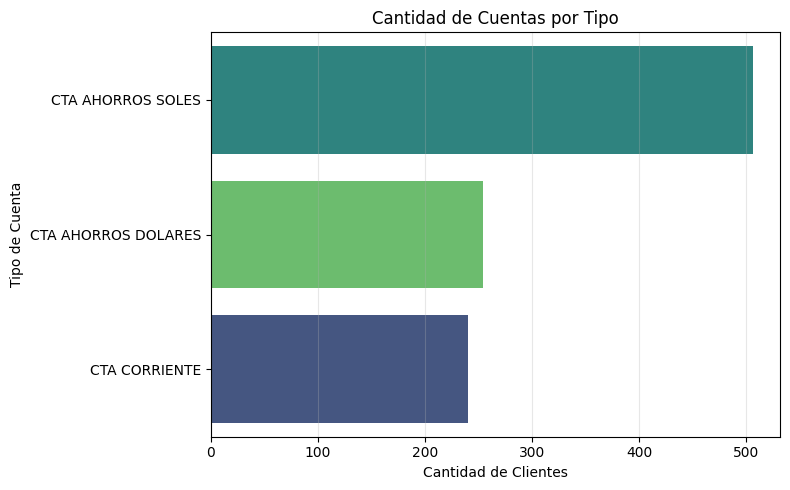

In [11]:
plt.figure(figsize=(8,5)) 
sns.countplot(y="TipoCuenta", data=df, order=df["TipoCuenta"].value_counts().index, palette="viridis") 
sns.countplot( 
y="TipoCuenta", 
hue="TipoCuenta",  # <-- asigna la misma variable a hue 
data=df, 
order=df["TipoCuenta"].value_counts().index, 
palette="viridis", 
legend=False  # <-- oculta la leyenda redundante 
) 
plt.title("Cantidad de Cuentas por Tipo") 
plt.xlabel("Cantidad de Clientes") 
plt.ylabel("Tipo de Cuenta") 
plt.grid(axis='x', alpha=0.3) 
plt.tight_layout() 
plt.savefig(reports_path / "cuentas_por_tipo.png") 
plt.show() 

### 3. Promedio de saldo por sucursal
Para mantener el efecto visual y eliminar la advertencia, convierte tus datos en un DataFrame y usa hue con 
la variable categórica (en este caso, las sucursales).

C:\Users\balfa\AppData\Local\Temp\ipykernel_23812\213014236.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_sucursal.values, y=promedio_sucursal.index, palette="coolwarm")


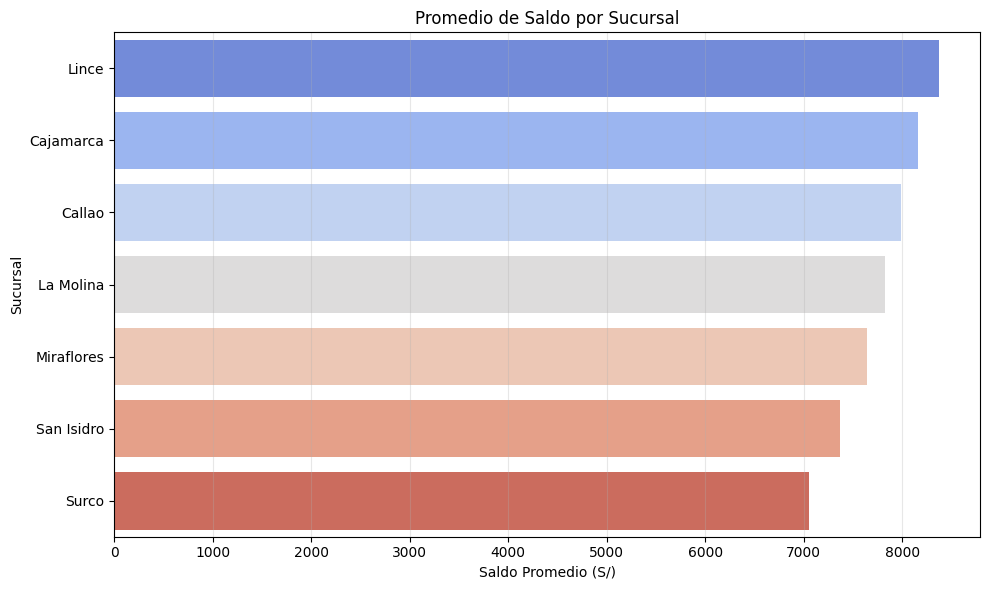

In [13]:
#promedio por sucursal 
promedio_sucursal = df.groupby("Sucursal")["Saldo"].mean().sort_values(ascending=False) 
# Convertir a DataFrame para compatibilidad con seaborn >=0.14 
df_prom = promedio_sucursal.reset_index() 
df_prom.columns = ["Sucursal", "PromedioSaldo"] 
plt.figure(figsize=(10,6))

sns.barplot(x=promedio_sucursal.values, y=promedio_sucursal.index, palette="coolwarm") 
sns.barplot( 
data=df_prom, 
x="PromedioSaldo", 
y="Sucursal", 
hue="Sucursal", 
palette="coolwarm", 
legend=False 
) 
plt.title("Promedio de Saldo por Sucursal") 
plt.xlabel("Saldo Promedio (S/)") 
plt.ylabel("Sucursal") 
plt.grid(axis='x', alpha=0.3) 
plt.tight_layout() 
plt.savefig(reports_path / "promedio_saldo_sucursal.png") 
plt.show()

### 4. Clientes con mayor saldo

In [14]:
top_clientes = df.nlargest(5, "Saldo")[["Cli_codigo", "Saldo", "Sucursal"]] 
print("\nTop 5 clientes con mayor saldo:\n", top_clientes) 


Top 5 clientes con mayor saldo:
     Cli_codigo     Saldo    Sucursal
464      C0465  14992.50  Miraflores
375      C0376  14960.43  Miraflores
563      C0564  14911.26  San Isidro
227      C0228  14906.94       Lince
389      C0390  14897.32   Cajamarca
